In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/My Drive/estonia-passenger-list.csv')

In [6]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


## How many Survived?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


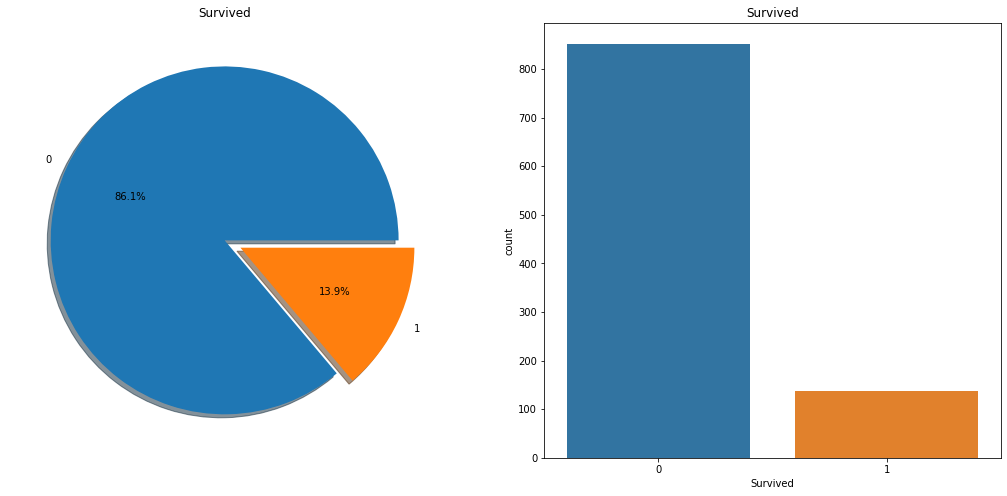

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Observation

Only 13.9% passengers on ship survived. 


## Passengers onboard




### Gender 

In [8]:
data['Sex'].value_counts()


M    503
F    486
Name: Sex, dtype: int64

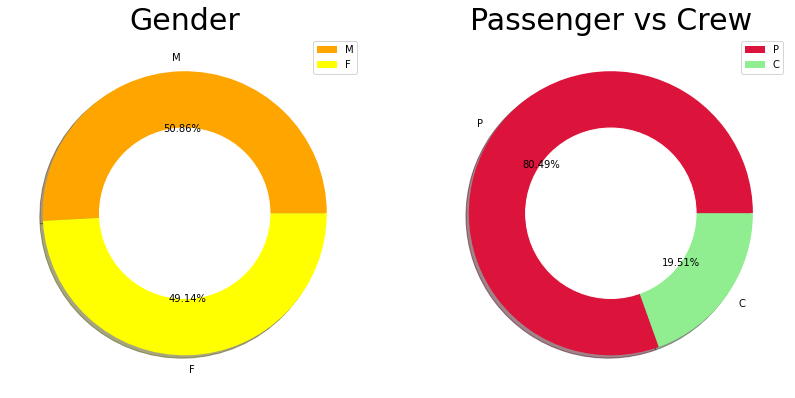

In [9]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (14,14))

size = data.Sex.value_counts().values

colors = ['orange', 'yellow']
labels = data.Sex.value_counts().index
explode = [0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

size = data.Category.value_counts().values

colors = [ 'crimson', 'lightgreen']
labels = data.Category.value_counts().index
explode = [0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Passenger vs Crew', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()


### Nationalities onboard

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Netherlands        2
Morocco            2
Great Britain      2
France             1
Belarus            1
Nigeria            1
Canada             1
Name: Country, dtype: int64


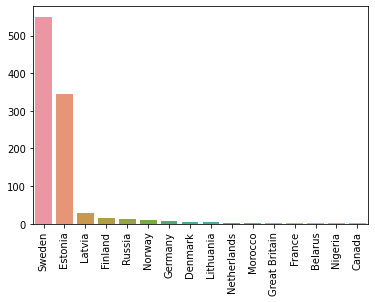

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show death counts by country
print(data.Country.value_counts())

ax = sns.barplot(
    x = data['Country'].value_counts().keys(), 
    y = data['Country'].value_counts().values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Popular Surname lost lives

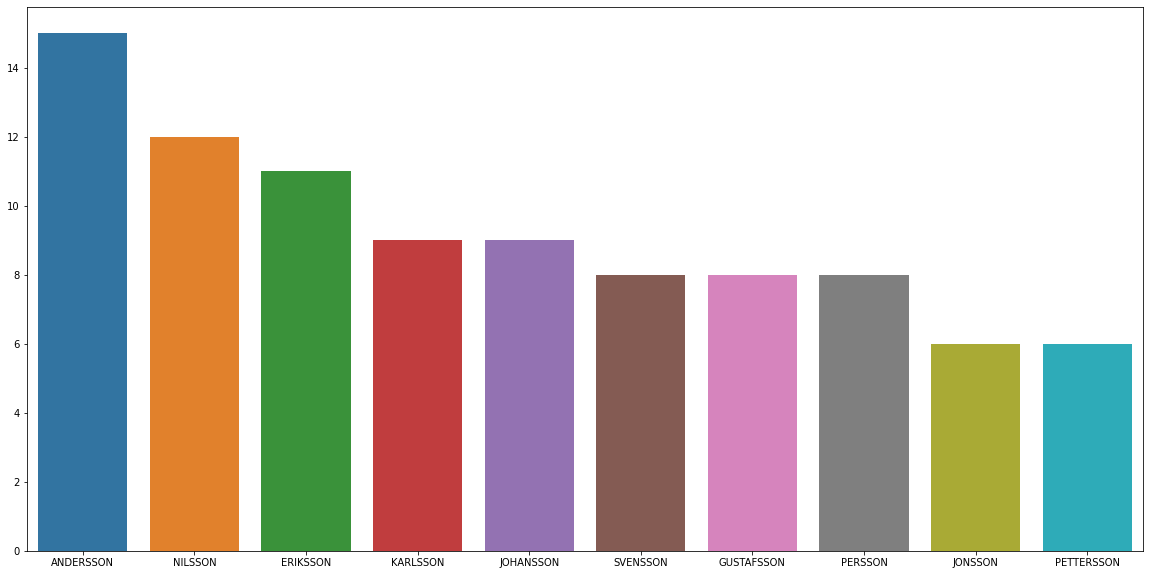

In [11]:

plt.figure(figsize=(20,10))

values = data['Lastname'].value_counts().tolist()[:10]
names = list(dict(data['Lastname'].value_counts()).keys())[:10]

sns.barplot(
    x=names,
    y=values)

plt.show()

### Observation

As per the donut chart it can be concluded that there where equal number of male and female passengers on the unfortunate ship. We can also conclude that the ratio of passangers are more compare to the ratio of crew members. The gender data is somewhat balanced but the category data is imbalanced

## Age Distribution 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


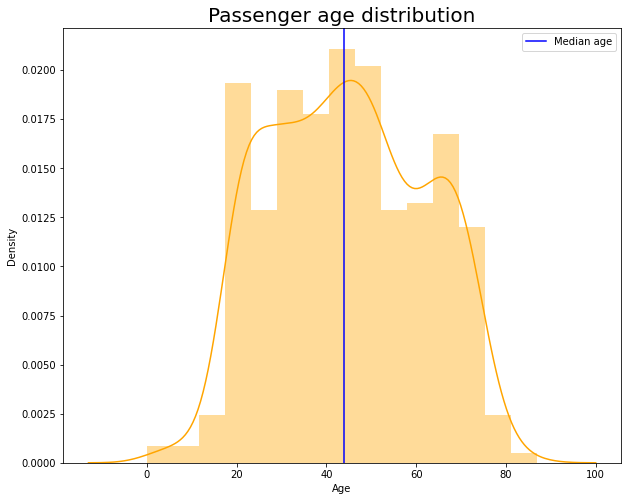

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(data['Age'],color= 'orange')
plt.title('Passenger age distribution',size=20)
plt.axvline(data['Age'].median(),color='blue',label='Median age')
plt.legend()

### Observation 1
In the above normalization curve the median age of both the gender is around 45 years. Let us observe the age distribution of each gender and know their median age.

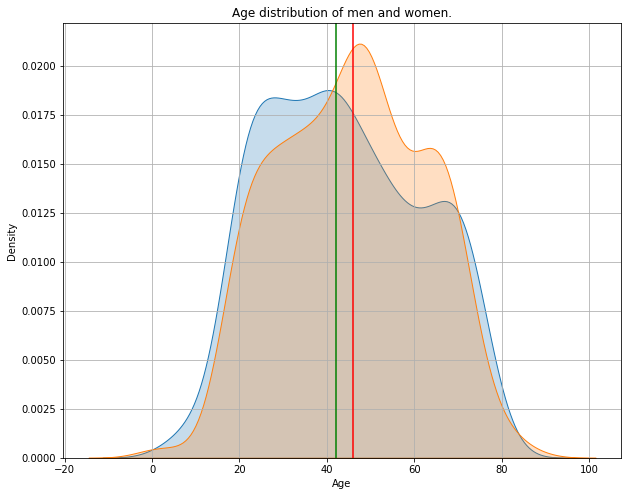

In [13]:
plt.figure(figsize=(10,8))
plt.title('Age distribution of men and women.')
g = sns.kdeplot(data['Age'].loc[data['Sex'] == 'M'], 
                shade= True, label='Male').set_xlabel('Age')
g = sns.kdeplot(data['Age'].loc[data['Sex'] == 'F'], 
                shade=True, label='Female')

plt.axvline(data['Age'].loc[data['Sex']== 'M'].median(),color='green',label='Median age- Male')
plt.axvline(data['Age'].loc[data['Sex']== 'F'].median(),color='red',label='Median age- Female')

plt.grid()

### Observation 2

The age distribution are quite similar to each other. The curves are masking each other except the top right distibution. It can be concluded that the median age of female was more then male.


## Age vs Category

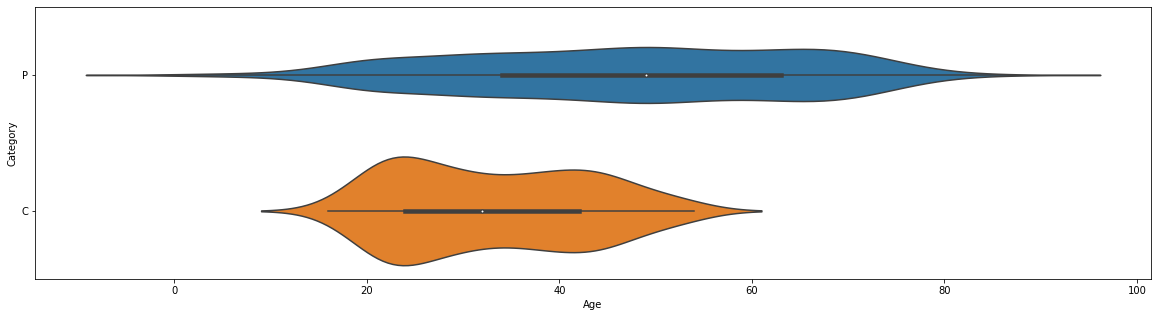

In [14]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='Age', y = 'Category', data = data)
plt.show()

### Observation

There were more passengers and less crew which is logical. The crew's median age is between the range of 30 to 45 and the passanges' age is between 30-65. 
Hence, falling under the age median age group of 40-60 as observed in age distribution normalization curve. 

As we have already divided the ages into groups lets' check the percentage of Adults, Youth, Senior, Child were travelling.

## Age Group 

<Figure size 1296x1080 with 0 Axes>

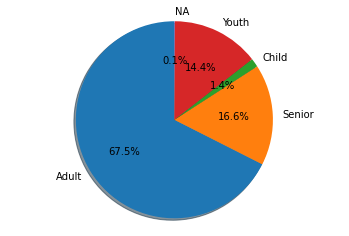

In [15]:
plt.figure(figsize=(18,15))


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Adult', 'Senior', 'Child', 'Youth','NA'
sizes = [668, 164, 14, 142,1]
explode = (0, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Observation 1: 
Most of them were adults.It is also show 1.3% were children.
Lets check if there was an infant on the ship.


In [16]:
data[data.Age<1]

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
969,970,Estonia,KATRE,ZELMIN,F,0,P,0


In [17]:
data[data.Lastname=='ZELMIN']


,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
968,969,Estonia,AIVAR,ZELMIN,M,27,P,0
969,970,Estonia,KATRE,ZELMIN,F,0,P,0
970,971,Estonia,KRETE,ZELMIN,F,2,P,0


### Observation2
There was a family in the ship with the child and infant. Unfortunately no one survived. 
To Do: You may set an age less than 12 and see which passenger was with the child. There could be one or more famiies onboard. 

## Country VS Age

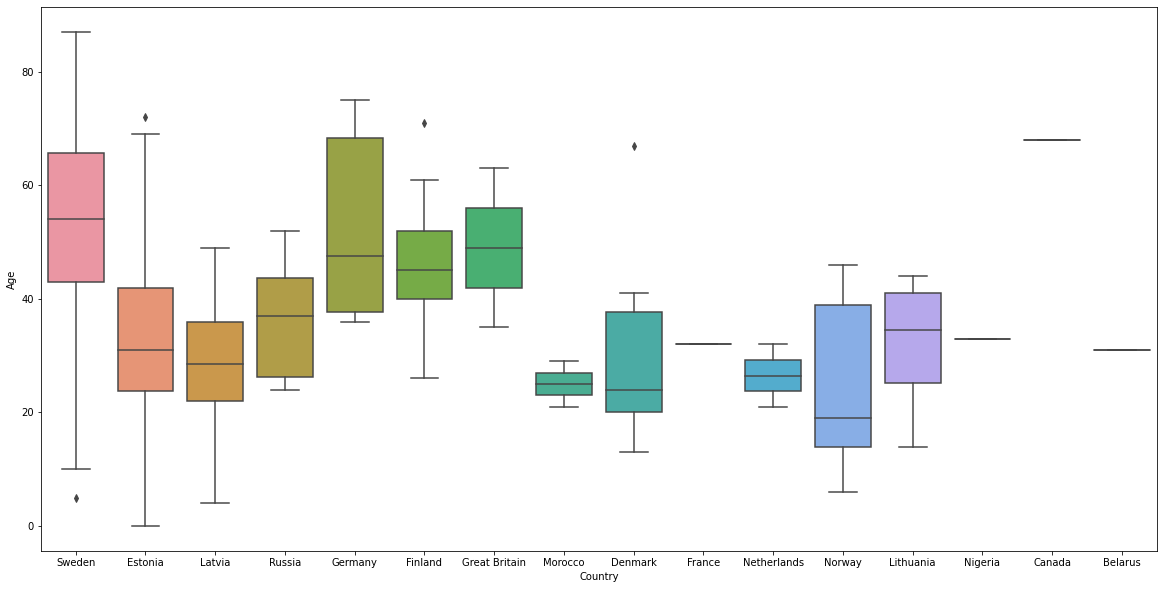

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x ='Country', y = 'Age', data = data)
plt.show()

### Observation

There were few Senior Adults from Estonia, Finland, Denmark. 
Sweden, Estinia,Gemary, Great Brtain had the most number of Senior adults.
As there was one Canadian on board, it can be concluded that he was a senior adult.  

## Age vs Survived

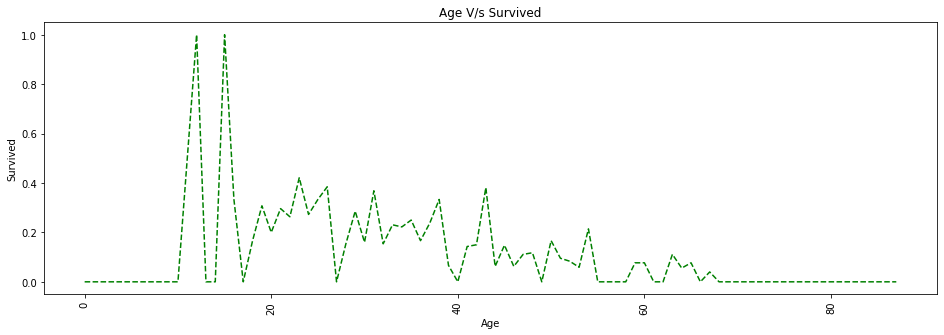

In [19]:
grp =data.groupby("Age")

plt.figure(figsize=(16,5))
plt.plot(grp["Survived"].agg(np.mean),'r--',color='g')
plt.xticks(rotation=90)
plt.title("Age V/s Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

### Observation

Unfortunately the Children below the age of 5 and Senior Adults above the age of 65 could not survive. 
Most of the Adults and Youths were able to save their lives. 
Did the gender played role in the survival? Lets see. 

## Sex vs Survived

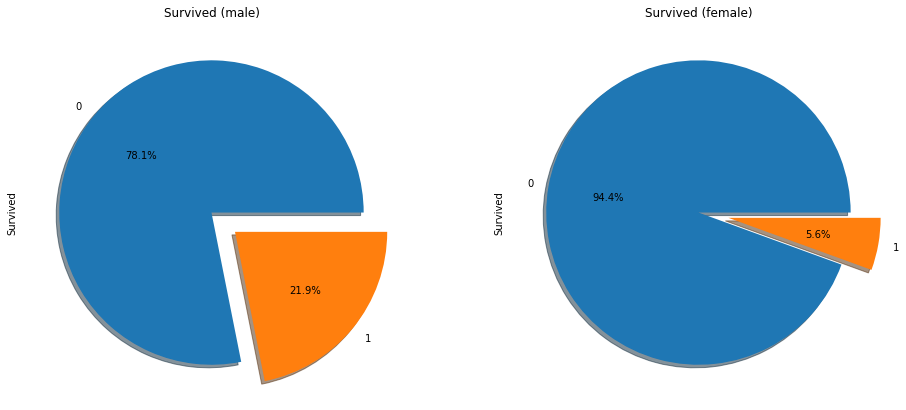

In [20]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data['Survived'][data['Sex']=='M'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Survived'][data['Sex']=='F'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

### Observation 

More number of Male survived compared to female. lets observe the age group of male and female survived.

## Sex vs Category

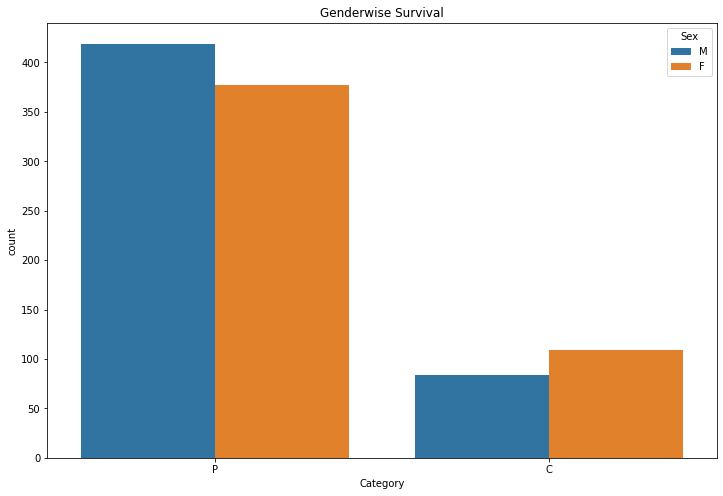

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='Category',hue='Sex',data=data)
plt.title('Genderwise Survival')
plt.show()

### Obeservation 1
There were more men in passenger category. Where as there were more females in the crew. Lets see who survie the most amongst the category

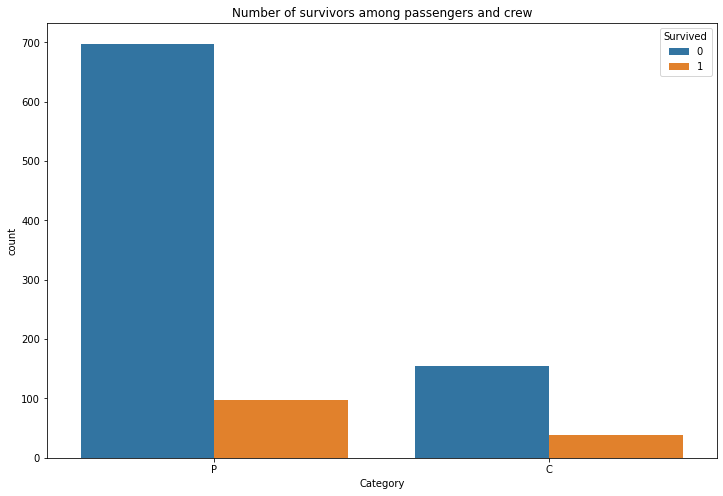

In [22]:
plt.figure(figsize=(12,8))
p = sns.countplot(x = 'Category', hue = 'Survived', data = data
                ).set_title('Number of survivors among passengers and crew')

### Observation 2
Very well, according to the plot above there were more passenges survived compared to the crew members. But this can also be possible because passengers were more compared to the crew. We need to find the survival rate of both the categories. 
We will find out the count of survived members of each categories and divide them by 100 to find the survival percentage.

## Sex vs Category vs Survive

In [23]:
c_survived = data['Category'][(data['Category'] == 'C')& (data['Survived'] == 1)].count()
c_all = data['Category'][data['Category'] == 'C'].count()
p_survived = data['Category'][(data['Category'] == 'P') & (data['Survived'] == 1)].count()
p_all = data['Category'][data['Category'] == 'P'].count()
c_percent = c_survived / c_all * 100
p_percent = p_survived / p_all * 100
print(f'The percentage of survivors among the crew members: {round(c_percent, 3)}%')
print(f'The percentage of survivors among the passengers: {round(p_percent, 3)}%')

The percentage of survivors among the crew members: 20.207%
The percentage of survivors among the passengers: 12.312%


### Obeservation 
Ok! so its safe to say **that crew members saved themselves proactively than saving the passengers**. Looking at the [doughnut chart](https://colab.research.google.com/drive/1Na4QVZjuAbVe1Zb_RbyfuQS9Ms7p9K_H#scrollTo=9iENFteOiYWD) our assumption about imbancled data was correct. 

The survival percentage is almost double compare to the passenger catagory. It is the opposite of what happend in RMS Titanic.

Well lets now observe which contry was at maximum loss.

## Sex Vs Country Vs Survive 

In [24]:
pd.crosstab([data.Sex, data.Survived], [data.Country], margins=True).style.background_gradient(cmap='autumn_r')

### Observation

The shade of red indicates the highest to the lowset. Here we got the exact number of gender gurvived the incident. 
Unfortunately, there were more females than male on board only 27 could survive.

## Finding Correlation using Heat Map 

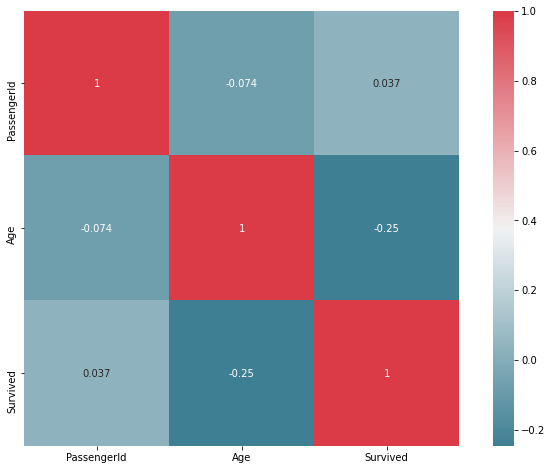

In [25]:
# heatplot
plt.figure(figsize=(12,8))

corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)


# Feature Engineering

## Data Pre-processing

The model can take the numerical data. Before plugging in the data into the model it is important to pre-process it. In this case there are no missing values so there is no need to drop or replace the value. 

As, passenger ID, Firstname and Lastname coloumn has no affect on out passenger classification, with the help of `drop` function we will delete these columns

In [26]:
data.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [28]:
data=data.drop(['PassengerId','Firstname','Lastname'],axis=1) #drop columns that will have no effect on model predictions


In [29]:
X = data.drop(['Survived'], axis=1)

y = data['Survived']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [31]:
X_train.shape, X_test.shape


((692, 4), (297, 4))

In [32]:
data.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


## Feature Scaling- One Hot Encoding

In [33]:
!pip install --upgrade category_encoders


     |████████████████████████████████| 81kB 8.5MB/s 


In [34]:
import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Country', 'Sex', 'Category'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
X_train.head()

,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Country_9,Country_10,Country_11,Country_12,Country_13,Country_14,Country_15,Sex_1,Sex_2,Age,Category_1,Category_2
927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,24,1,0
914,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,0
712,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,59,1,0
20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,63,1,0
895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,28,1,0


In [36]:
X_train.shape, X_test.shape


((692, 20), (297, 20))

# Advanced Algorithm

## Decision Tree Classifier

### Default Parameters

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=2)
dtc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.8352601156069364
Test Score: 0.797979797979798


### Grid Search CV

In [38]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = DecisionTreeClassifier()

# Choose some parameter combinations to try
parameters  = {'criterion':['gini','entropy'],'max_depth':[20,30,40,50,70,90,120,150],'max_leaf_nodes': [9,10,11,12], 'random_state': [42,73,94]}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf1 = grid_obj.best_estimator_
clf1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [39]:
print("Test Score:",clf1.score(X_test,y_test))

Test Score: 0.8417508417508418


In [40]:
print("Train Score:",clf1.score(X_train,y_train))

Train Score: 0.8728323699421965


### Learning Curve

In [41]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()   


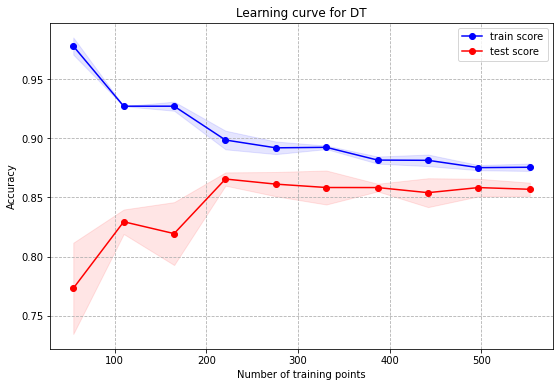

In [42]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= clf1 , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 5,  scoring= acc_scorer, n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for DT')

## AdaBoost Classifer

### Default Parameters

In [43]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state = 42)
accuracies = cross_val_score(abc, X_train, y_train, cv=5)
abc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",abc.score(X_test,y_test))

Train Score: 0.8598269210718381
Test Score: 0.8215488215488216


### Grid Search

In [44]:
ada=AdaBoostClassifier()
search_gri={'n_estimators':[300,500,800],'learning_rate':[.001,0.01,.1]}
ada_grid =GridSearchCV(estimator=ada,param_grid=search_gri,scoring='accuracy',n_jobs=2,cv= 10)

ada_grid.fit(X_train,y_train)
print("Test Score:",ada_grid.score(X_test,y_test))

Test Score: 0.8451178451178452


In [45]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()  

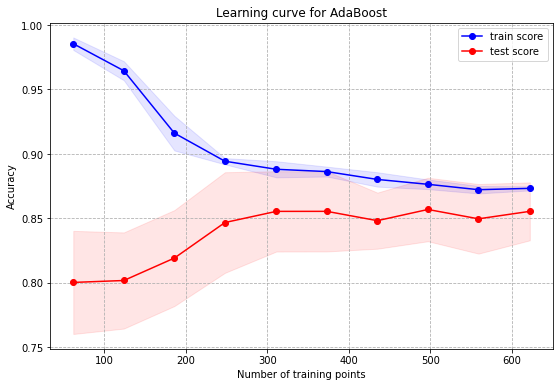

In [46]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= ada , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for AdaBoost')

## Random Forest 

### Default Parameters

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier(n_estimators=100,random_state=1)
forest_model.fit(X_train,y_train)
prediction=forest_model.predict(X_test)
print("Test Score:",accuracy_score(y_test,prediction.round()))


Test Score: 0.7777777777777778


### Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [25, 50, 100],
    'max_features': [4, 5],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [10, 12],
    'n_estimators': [250, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_search= grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Train Score:",grid_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
print("Test Score:",grid_search.score(X_test,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_rf = grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
report = classification_report(y_test,y_pred_rf)
print("---------------------Classification Report Random Forest -Default Params-----------------------")

print('\n Confusion Matrix is \n',cm)
print('\n Classification Matrix \n',report)

In [ ]:
grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    

In [ ]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= forest_model , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RF')

# Feature Importance

In [ ]:
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,7))
plt.title("Feature importances")
ax = plt.bar(range(X_test.shape[1]), importances[indices],
       color="br", align="center")
plt.show()

### Top-10 Features

In [ ]:
importances=ada.feature_importances_
feature_importances=pd.Series(importances, index=X_test.columns).sort_values(ascending=False)
x=feature_importances[0:10]
y=feature_importances.index[0:10]
sns.barplot(x,y)
plt.title('Feature Importance')
plt.ylabel("Features")


### Accuracy using important features

In [ ]:

X_train_top = X_train.drop(['Country_3','Country_2','Country_1'], axis=1)

X_test_top = X_test.drop(['Country_3','Country_2','Country_1'], axis=1)

In [ ]:
# fit the model to the training set

dtc.fit(X_train_top, y_train)


# Predict on the test set results

y_pred = dtc.predict(X_test_top)



# Check accuracy score 

print('Model accuracy score with country variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))